In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
YEARS = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

df = pd.concat([
    pd.read_csv(f"data/{y}/INMET_SE_RJ_A610_PICO DO COUTO_01-01-{y}_A_31-12-{y}_NORMALIZADO_MENSAL.CSV") 
    for y in YEARS
])

df["DATA"] = pd.to_datetime(df["DATA"])
df = df.set_index("DATA")

df.head()


,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
DATA,,,,,,
2015-01-01,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-02,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-03,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-04,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098
2015-01-05,1.204232,-0.418893,-0.393397,-0.416882,0.545758,0.545098


In [3]:
pd.set_option('display.float_format', '{:.5f}'.format)
df.describe()

,PRECIPITAÇÃO TOTAL HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB),PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB),TEMPERATURA MÁXIMA NA HORA ANT. (°C),TEMPERATURA MÍNIMA NA HORA ANT. (°C)
count,3653.00000,3653.00000,3653.00000,3653.00000,3653.00000,3653.00000
mean,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00014,1.00014,1.00014,1.00014,1.00014,1.00014
min,-0.84687,-8.64283,-8.78377,-9.10530,-4.30567,-4.47229
25%,-0.46559,-0.54518,-0.54905,-0.52909,-0.64164,-0.59592
50%,-0.37008,0.08508,0.08378,0.09002,-0.02131,0.00365
75%,-0.08395,0.54168,0.54445,0.54423,0.70387,0.70498
max,9.78499,4.02233,4.04587,4.04833,4.88784,4.64377


In [4]:
# check for stationarity

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series: pd.Series, feature_name: str):
    result = adfuller(series.dropna())

    print(f'ADF Statistic for {feature_name}: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] < 0.05:
        print(f"The {feature_name} series is stationary.")
    else:
        print(f"The {feature_name} series is NOT stationary. Differencing is needed.")

features = [f for f in df.columns if f != "PRECIPITAÇÃO TOTAL HORÁRIO (mm)"]
for feature in features:
    check_stationarity(df[feature], feature)
    print("-" * 50)

ADF Statistic for PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB): -6.320482145476752
p-value: 3.07490096245785e-08
The PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB) series is stationary.
--------------------------------------------------
ADF Statistic for PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB): -6.3480846722269435
p-value: 2.6522612710789833e-08
The PRESSÃO ATMOSFERICA MAX. NA HORA ANT. (mB) series is stationary.
--------------------------------------------------
ADF Statistic for PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB): -6.382618418331952
p-value: 2.2032503600313144e-08
The PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (mB) series is stationary.
--------------------------------------------------
ADF Statistic for TEMPERATURA MÁXIMA NA HORA ANT. (°C): -5.356756568360788
p-value: 4.172530494459823e-06
The TEMPERATURA MÁXIMA NA HORA ANT. (°C) series is stationary.
--------------------------------------------------
ADF Statistic for TEMPERATURA MÍNIMA NA HORA ANT. (°C): -6.100

In [11]:
# Split data
precip_train = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"][:"2022-12-31"]
precip_test = df["PRECIPITAÇÃO TOTAL HORÁRIO (mm)"]["2023-01-01":]

exog_train = df[["PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO HORARIA (mB)", "TEMPERATURA MÁXIMA NA HORA ANT. (°C)"]][:"2022-12-31"]
exog_test = df[features]["2023-01-01":]

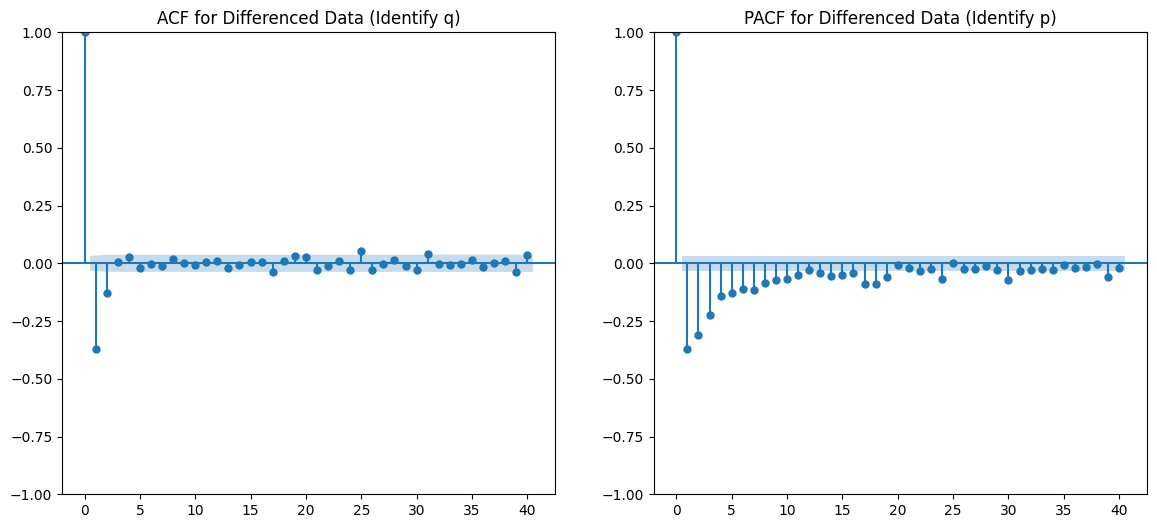

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have a time series 'df_combined' with 'precipitation' column
# First, apply differencing to achieve stationarity
df_diff = df['PRECIPITAÇÃO TOTAL HORÁRIO (mm)'].diff().dropna()

# ACF and PACF plots for differenced series to determine p, q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ACF Plot
plot_acf(df_diff, lags=40, ax=ax1)
ax1.set_title('ACF for Differenced Data (Identify q)')

# PACF Plot
plot_pacf(df_diff, lags=40, ax=ax2)
ax2.set_title('PACF for Differenced Data (Identify p)')

plt.show()

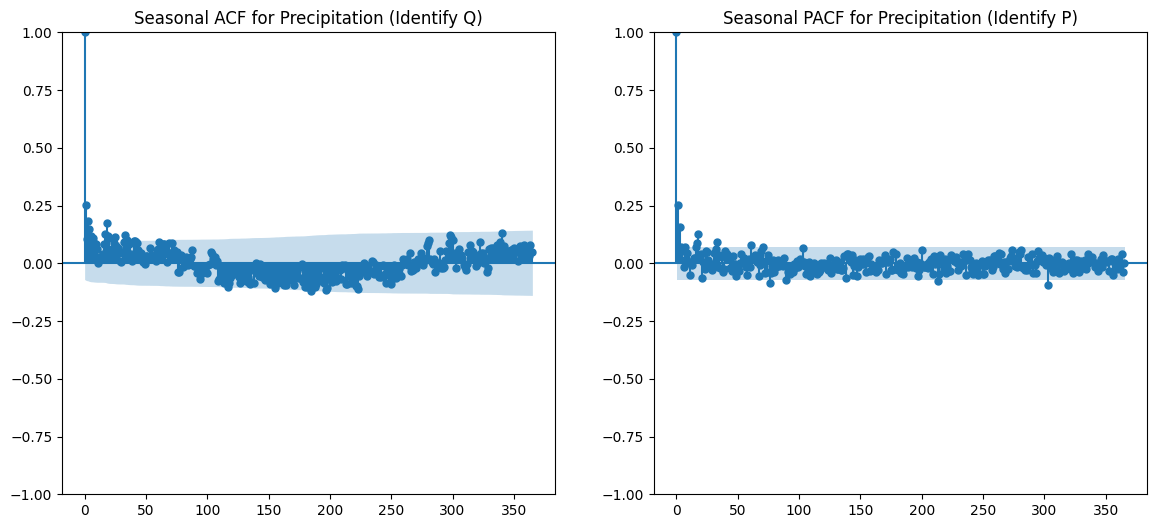

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Seasonal ACF and PACF (lag multiples of seasonal period)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Seasonal ACF Plot
plot_acf(precip_test, lags=365, ax=ax1)  # Seasonal lags = 365
ax1.set_title('Seasonal ACF for Precipitation (Identify Q)')

# Seasonal PACF Plot
plot_pacf(precip_test, lags=365, ax=ax2)
ax2.set_title('Seasonal PACF for Precipitation (Identify P)')

plt.show()

In [13]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model with the identified parameters (p, d, q, P, D, Q, s)
model = SARIMAX(precip_train, 
                exog=exog_train, 
                order=(p, d, q),  # Non-seasonal order
                seasonal_order=(P, D, Q, s),  # Seasonal order
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/joao/Downloads/dados_preciptacao/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:     PRECIPITAÇÃO TOTAL HORÁRIO (mm)   No. Observations:                 2922
Model:               SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3753.413
Date:                             Mon, 03 Feb 2025   AIC                           7520.826
Time:                                     22:55:23   BIC                           7562.646
Sample:                                 01-01-2015   HQIC                          7535.893
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
PRESSAO ATMOSFERICA AO